# 🧬 Project 5: Probability of Mutation in DNA Sequencing (Statistical Modeling)

## Overview
In this notebook, we explore the intersection of statistics and bioinformatics. We will use the **Binomial Distribution** to model the randomness of mutations in a DNA sequence. Biological systems are inherently noisy, and random background mutations occur naturally during DNA replication or due to environmental factors.

By modeling these mutations as independent Bernoulli trials (Success = Mutation, Failure = No Mutation), we can predict the expected number of mutations and identify **statistically significant anomalies** that may indicate pathogenic factors, cancer risks, or exposure to mutagens.

## The Statistical Engine: Binomial Distribution
The Binomial Distribution calculates the probability of getting exactly $k$ successes in $n$ independent trials, given a constant probability of success $p$.

**Probability Mass Function (PMF):**
$$P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}$$

**Cumulative Distribution Function (CDF):**
$$F(k) = P(X \le k) = \sum_{i=0}^{k} \binom{n}{i} p^i (1 - p)^{n - i}$$

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Set plot style for better aesthetics
plt.style.use('ggplot')

## 🔬 Scenario: Simulating a 10,000 Base-Pair Sequence
Let's assume we are analyzing a specific gene region consisting of 10,000 base pairs ($n = 10000$). Based on prior literature, the natural background mutation rate for this specific organism/region is 0.1% per base pair ($p = 0.001$).

* **$n$ (trials):** 10,000 (Number of nucleotides)
* **$p$ (probability of mutation per nucleotide):** 0.001
* **Expected Value ($\mu$):** $n \times p = 10$ expected background mutations.

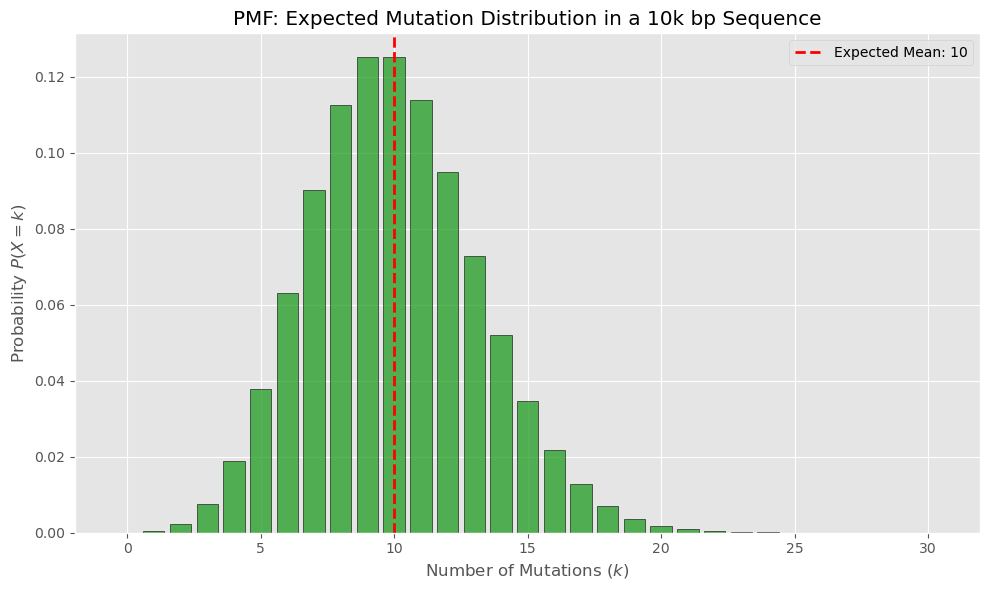

Probability of observing exactly 15 mutations: 0.0347 (or 3.47%)


In [3]:
# Define parameters
n = 10000  # Total base pairs
p = 0.001  # Background mutation probability

# Generate an array of possible mutation counts (e.g., from 0 to 30)
k_values = np.arange(0, 31)

# Calculate the Probability Mass Function (PMF) for exactly 'k' mutations
pmf_values = binom.pmf(k_values, n, p)

# Visualizing the PMF
plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values, color='#2ca02c', alpha=0.8, edgecolor='black')
plt.title('PMF: Expected Mutation Distribution in a 10k bp Sequence')
plt.xlabel('Number of Mutations ($k$)')
plt.ylabel('Probability $P(X = k)$')

# Add a vertical line for the expected value
expected_value = n * p
plt.axvline(x=expected_value, color='red', linestyle='--', linewidth=2, label=f'Expected Mean: {int(expected_value)}')

plt.legend()
plt.tight_layout()
plt.show()



# Let's calculate the exact probability of seeing exactly 15 mutations
k_exact = 15
prob_exact = binom.pmf(k_exact, n, p)
print(f"Probability of observing exactly {k_exact} mutations: {prob_exact:.4f} (or {prob_exact*100:.2f}%)")

## 🚨 Disease Risk Estimation (Anomaly Detection)
While calculating exact probabilities (PMF) is useful, in clinical bioinformatics, we are usually more interested in **thresholds**. 

If a patient's sequenced DNA shows **22 mutations** in this region, is this just bad luck (natural variance), or is it a statistically significant anomaly (e.g., defective DNA repair mechanism, exposure to radiation)?

To answer this, we calculate the **p-value** using the **Cumulative Distribution Function (CDF)**. We want to know the probability of observing 22 *or more* mutations just by chance.
$$P(X \ge 22) = 1 - P(X \le 21) = 1 - CDF(21)$$

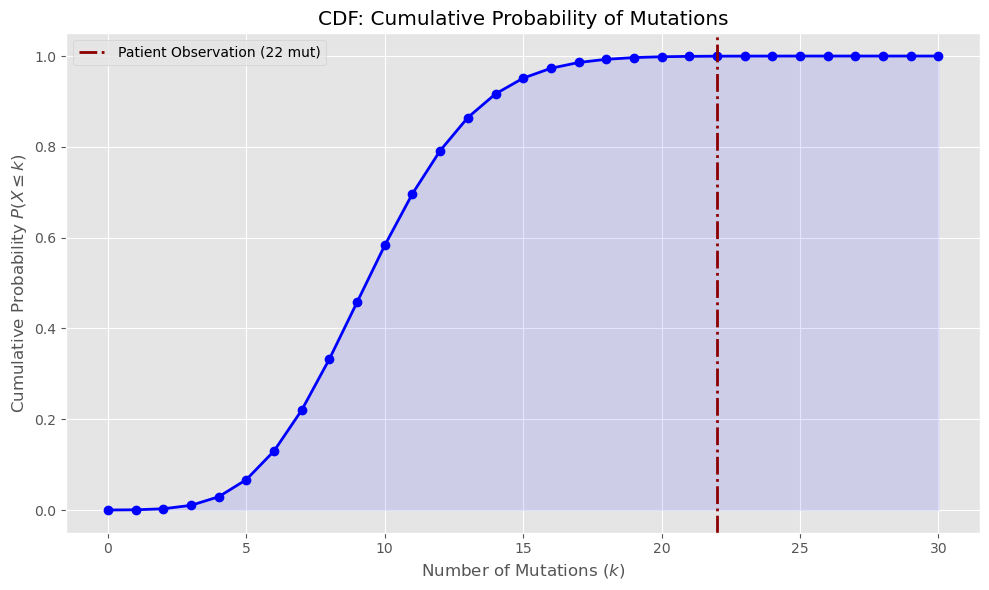

--- Clinical Statistical Report ---
Observed Mutations: 22
Expected Mutations: 10
Probability of observing 22 or MORE mutations by chance (p-value): 0.000695

[ALERT] Result is Statistically Significant (p < 0.05).
Conclusion: Anomaly detected! The high mutation rate is unlikely to be natural background noise.
Next Steps: Investigate for mutagens, cancer risks, or sequencing artifacts.


In [6]:
# Patient observation
patient_mutations = 22

# Calculate CDF: Probability of getting 21 or fewer mutations
cdf_value = binom.cdf(patient_mutations - 1, n, p)

# Calculate p-value: Probability of getting 22 or MORE mutations
p_value = 1 - cdf_value

# Visualizing the CDF and the Anomaly Threshold
cdf_values = binom.cdf(k_values, n, p)

plt.figure(figsize=(10, 6))
plt.plot(k_values, cdf_values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.fill_between(k_values, cdf_values, color='blue', alpha=0.1)

# Highlight the patient's data point
plt.axvline(x=patient_mutations, color='darkred', linestyle='-.', linewidth=2, label=f'Patient Observation ({patient_mutations} mut)')

plt.title('CDF: Cumulative Probability of Mutations')
plt.xlabel('Number of Mutations ($k$)')
plt.ylabel(r'Cumulative Probability $P(X \leq k)$')
plt.legend()
plt.tight_layout()
plt.show()



# Print statistical summary
print(f"--- Clinical Statistical Report ---")
print(f"Observed Mutations: {patient_mutations}")
print(f"Expected Mutations: {int(expected_value)}")
print(f"Probability of observing {patient_mutations} or MORE mutations by chance (p-value): {p_value:.6f}")

# Basic decision logic (alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("\n[ALERT] Result is Statistically Significant (p < 0.05).")
    print("Conclusion: Anomaly detected! The high mutation rate is unlikely to be natural background noise.")
    print("Next Steps: Investigate for mutagens, cancer risks, or sequencing artifacts.")
else:
    print("\n[NORMAL] Result is not statistically significant.")
    print("Conclusion: The observed mutation count is within the expected natural variance.")